<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Разделим-выборки-на-тренировочную,-валидационную-и-тестовую-методом-train_test_split." data-toc-modified-id="Разделим-выборки-на-тренировочную,-валидационную-и-тестовую-методом-train_test_split.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разделим выборки на тренировочную, валидационную и тестовую методом train_test_split.</a></span></li><li><span><a href="#Проверим-базовые-модели-Логистической-регрессии,-решающего-дерева-и-случайного-леса." data-toc-modified-id="Проверим-базовые-модели-Логистической-регрессии,-решающего-дерева-и-случайного-леса.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверим базовые модели Логистической регрессии, решающего дерева и случайного леса.</a></span></li><li><span><a href="#Выполним-подбор-гипер-параметров-моделей" data-toc-modified-id="Выполним-подбор-гипер-параметров-моделей-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Выполним подбор гипер-параметров моделей</a></span><ul class="toc-item"><li><span><a href="#Модели-с-подбором-гипер-паметров-дали-следующие-результаты:" data-toc-modified-id="Модели-с-подбором-гипер-паметров-дали-следующие-результаты:-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Модели с подбором гипер-паметров дали следующие результаты:</a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span><ul class="toc-item"><li><span><a href="#Выводы-о-Подготовке-данных" data-toc-modified-id="Выводы-о-Подготовке-данных-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Выводы о Подготовке данных</a></span></li><li><span><a href="#Выводы-о-Исследовании-задачи" data-toc-modified-id="Выводы-о-Исследовании-задачи-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Выводы о Исследовании задачи</a></span></li><li><span><a href="#Выводы-о-Борьба-с-дисбалансом" data-toc-modified-id="Выводы-о-Борьба-с-дисбалансом-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Выводы о Борьба с дисбалансом</a></span></li><li><span><a href="#Выводы-о-Тестировании-модели" data-toc-modified-id="Выводы-о-Тестировании-модели-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Выводы о Тестировании модели</a></span></li></ul></li><li><span></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import StandardScaler 

from sklearn.utils import resample, shuffle

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve



In [2]:
try:
    data=pd.read_csv('Churn.csv')
except:
    data=pd.read_csv('/datasets/Churn.csv')

In [3]:
data.shape

(10000, 14)

In [4]:
display(data.head(10))

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


В полученной таблице предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 
Данные в таблице представлены в количестве  14 столбцов и 10000 строк, одна строка один пользователь. 
Данные в таблице представлены следующих типов: object, float64, int64.

В таблице предоставлены следующие данные:

Признаки

    RowNumber — индекс строки в данных
    CustomerId — уникальный идентификатор клиента
    Surname — фамилия
    CreditScore — кредитный рейтинг
    Geography — страна проживания
    Gender — пол
    Age — возраст человек
    Tenure — сколько лет человек является клиентом банка
    Balance — баланс на счёте
    NumOfProducts — количество продуктов банка, используемых клиентом
    HasCrCard — наличие кредитной карты
    IsActiveMember — активность клиента
    EstimatedSalary — предполагаемая зарплата
    
Целевой признак

    Exited — факт ухода клиента

In [6]:
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Присутствуют пропуски данных с столбце Tenure( сколько лет человек является клиентом банка) в количестве 909 шт.
Значения в столбце Age (возраст человека) предоставлены положительным распределением с  отклонением в право.
На основе возрастных групп найдем медианные значения и заполним данные в столбце Tenure.

<Axes: xlabel='Age', ylabel='Count'>

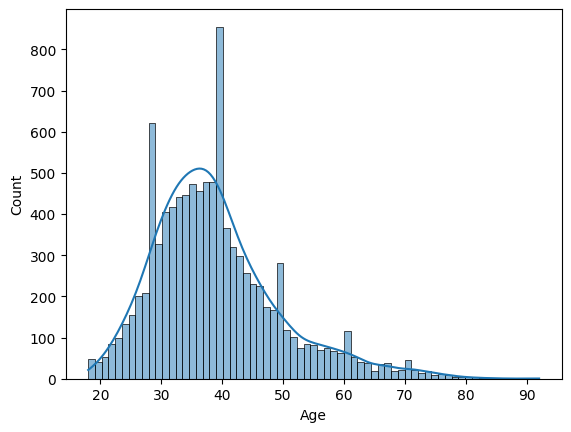

In [7]:
 sns.histplot(data=data['Age'], kde=True,  label='Остался')

In [8]:
data[(data['Age'] > 20) & (data['Age'] < 30)]['Tenure'].median()

5.0

In [9]:
data[(data['Age'] > 30) & (data['Age'] < 40)]['Tenure'].median()

5.0

In [10]:
data[(data['Age'] > 40) & (data['Age'] < 50)]['Tenure'].median()

5.0

In [11]:
data[(data['Age'] > 50) & (data['Age'] < 60)]['Tenure'].median()

5.0

In [12]:
data[(data['Age'] > 60) & (data['Age'] < 70)]['Tenure'].median()

5.0

In [13]:
data[(data['Age'] > 70) & (data['Age'] < 90)]['Tenure'].median()

5.0

In [14]:
data['Tenure'].median()

5.0

In [15]:
data['Tenure']=data['Tenure'].fillna(5)

In [16]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
data.duplicated().sum()

0

In [18]:
for col in data :
    print(f'{col}:{data[col].unique()}')

RowNumber:[    1     2     3 ...  9998  9999 10000]
CustomerId:[15634602 15647311 15619304 ... 15584532 15682355 15628319]
Surname:['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
CreditScore:[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 7

В полученной таблице предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 
Данные в таблице представлены в количестве  14 столбцов и 10000 строк, одна строка один пользователь. 
Данные в таблице представлены следующих типов: object, float64, int64.

В таблице предоставлены следующие данные:

Признаки

    RowNumber — индекс строки в данных
    CustomerId — уникальный идентификатор клиента
    Surname — фамилия
    CreditScore — кредитный рейтинг
    Geography — страна проживания
    Gender — пол
    Age — возраст
    Tenure — сколько лет человек является клиентом банка
    Balance — баланс на счёте
    NumOfProducts — количество продуктов банка, используемых клиентом
    HasCrCard — наличие кредитной карты
    IsActiveMember — активность клиента
    EstimatedSalary — предполагаемая зарплата
    
Целевой признак

    Exited — факт ухода клиента
    

Присутствующие  пропуски данных с столбце Tenure( сколько лет человек является клиентом банка) в количестве 909 шт заполнены медианным значением  5 лет по возрастным группам.

## Исследование задачи

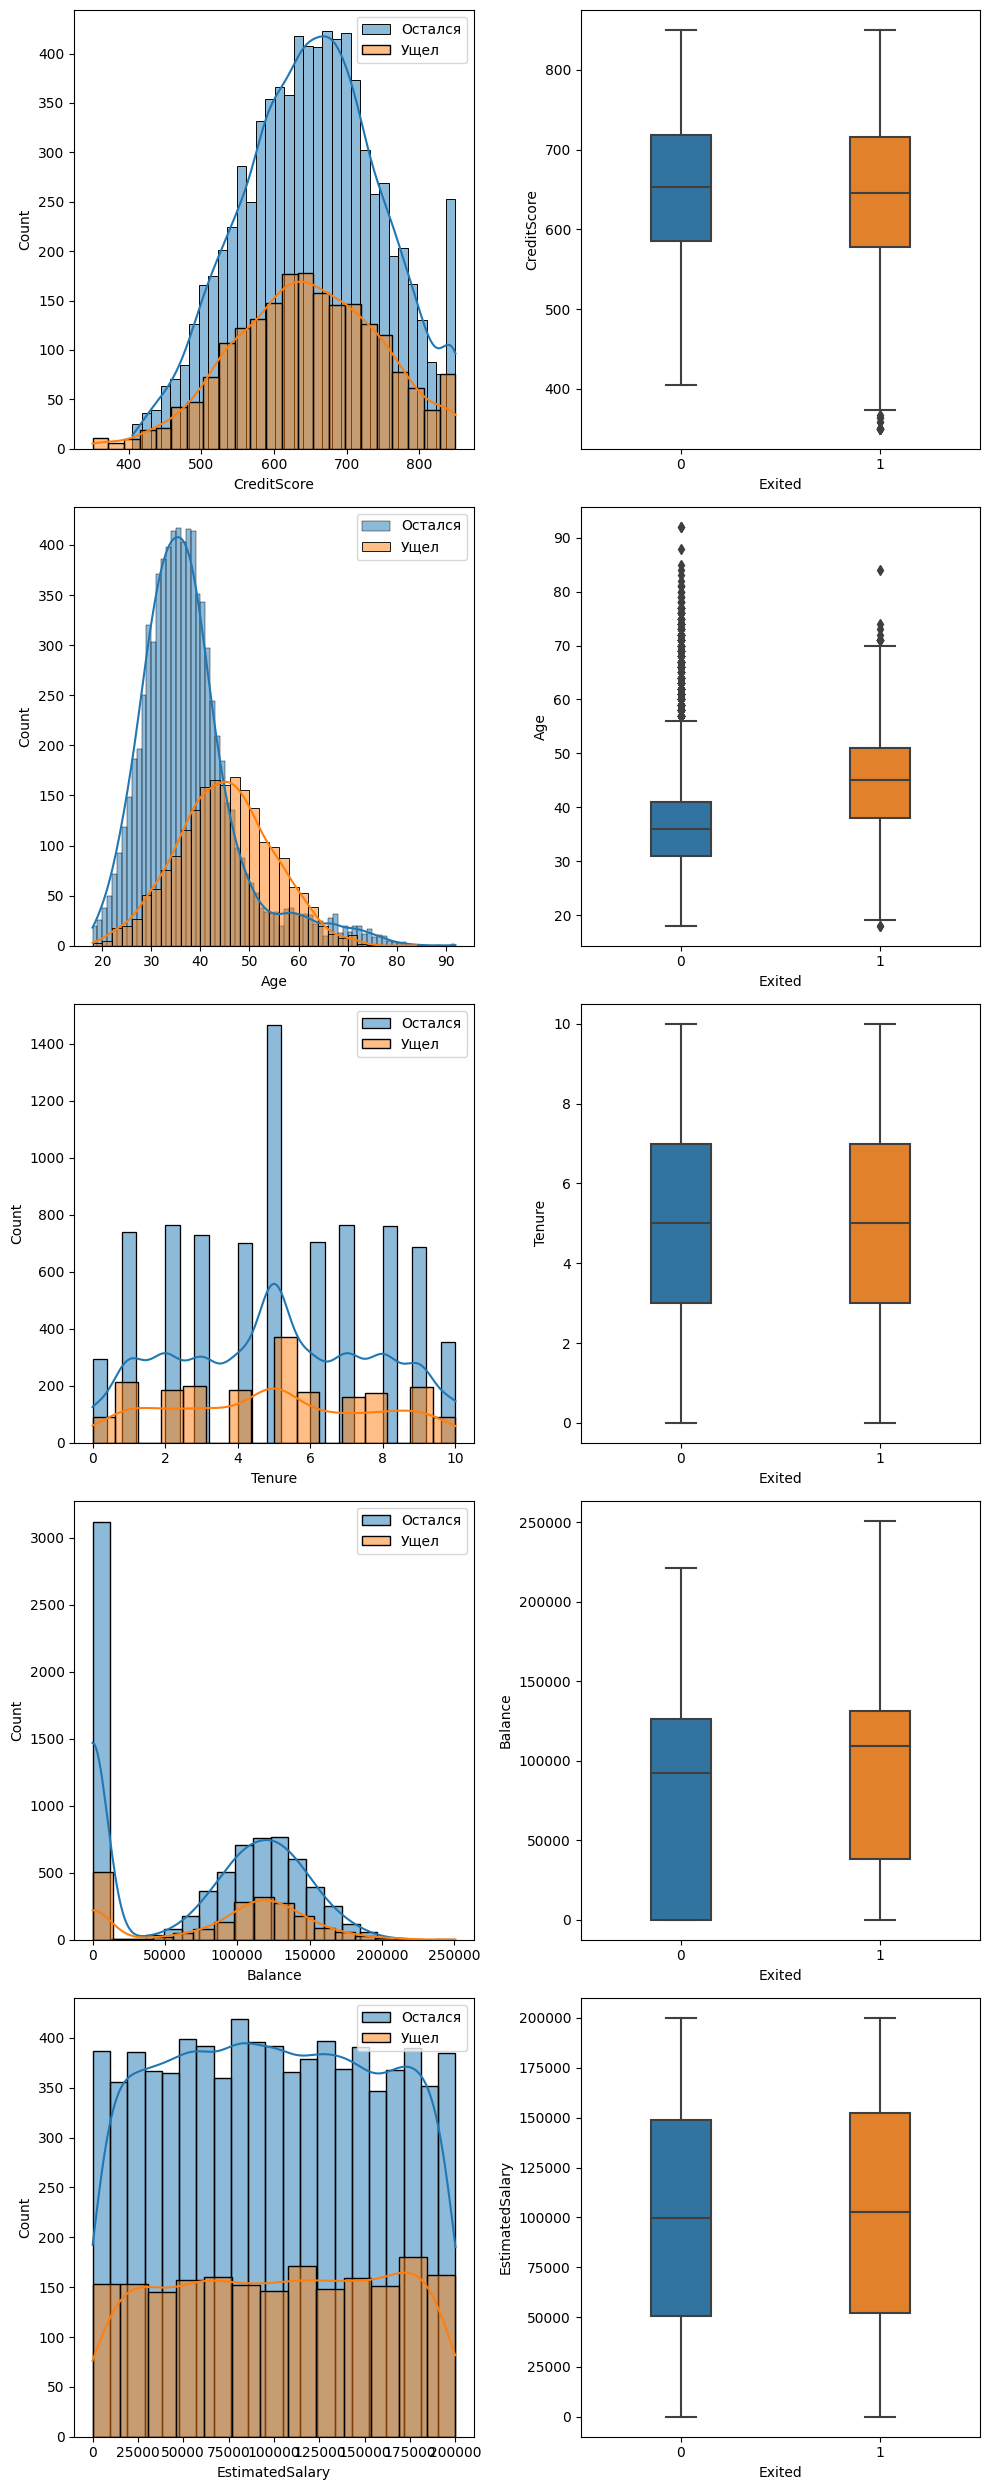

In [19]:
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

fig, axes = plt.subplots(len(numeric_cols), 2, figsize=(10, 25))

for i, col in enumerate(numeric_cols):
    sns.histplot(data=data[data['Exited'] == 0][col], kde=True, ax=axes[i, 0], label='Остался')
    sns.histplot(data=data[data['Exited'] == 1][col], kde=True, ax=axes[i, 0], label='Ущел')
    axes[i, 0].legend()
    
    sns.boxplot(x='Exited', y=col, data=data, width=0.3, ax=axes[i, 1])

plt.tight_layout()
plt.show()

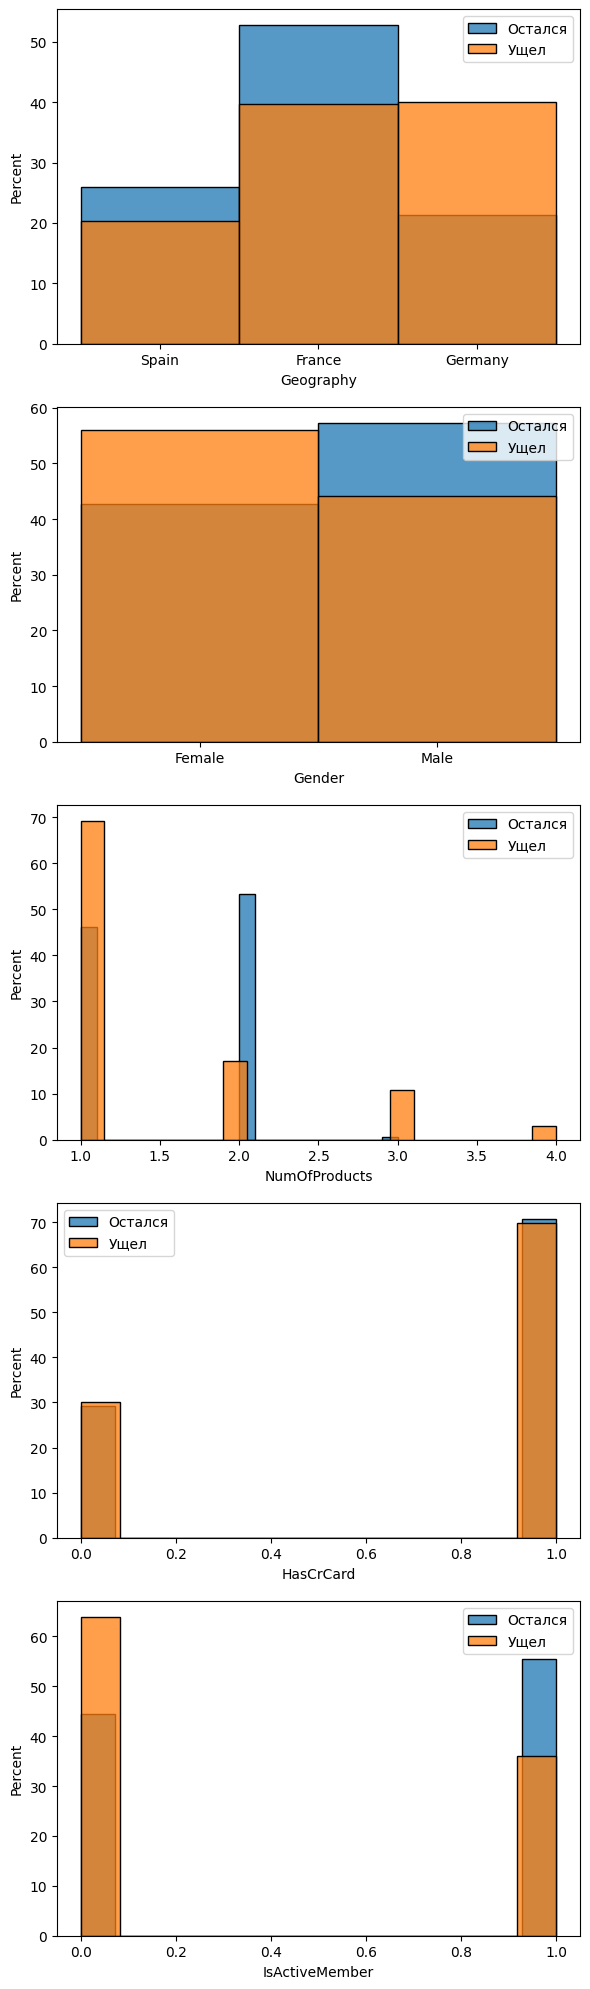

In [20]:
numeric_cols = ['Geography', 'Gender','NumOfProducts','HasCrCard','IsActiveMember']

fig, axes = plt.subplots(len(numeric_cols), figsize=(6, 20))

for i, col in enumerate(numeric_cols):
    sns.histplot(data=data[data['Exited'] == 0][col],  ax=axes[i], label='Остался' ,stat='percent')
    sns.histplot(data=data[data['Exited'] == 1][col], ax=axes[i], label='Ущел',stat='percent')
    axes[i].legend()
    

plt.tight_layout()
plt.show()

Рейтинги  ушедших и оставшихся клиентов  представлены нормальным  распределением с медианным значением 650 Score.

Возраст оставшихся клиентов представлен  положительным распределением с  отклонением в право  с  медианным значением 35 лет.

Возраст ушедших клиентов представлен  положительным распределением с  отклонением в право  с  медианным значением 45 лет.

Особое внимание следует обратить  на клиентов в возрасте от 45 до 65 лет.

Количество  лет которое человек является клиентом банка среди ушедших и оставшихся клиентов  распределено одинаково с медианным  значением 5 лет.

Баланс ушедших и оставшихся клиентов  представлен распределением  c двумя  пиками: нулевой баланс и 125 тыс.

Предполагаемые зарплаты представлены одинаково в объеме  100 тыс.

Банковские клиенты представлены тремя регионами Испания Франция и Германия, во всех трех регионах присутствует большая утечка клиентов, стоит отметить, что в Германии процент ушедших клиентов в 2 раза больше чем оставшихся.

По гендерному признаку стоит отметить, что женщины клиенты перестают быть клиентами банка на 10% чаще, чем мужчины.  

Исключим из данных столбцы  'RowNumber', 'CustomerId', 'Surname' они не несут  никакой информации для обучения модели.

In [21]:
data_drop_col = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Выполним прямое кодирование столбцов 'Geography', 'Gender'

In [22]:
data_ohe = pd.get_dummies(data_drop_col, columns=['Geography', 'Gender'] ,drop_first=True,dtype=float)

In [23]:
data_ohe

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0.0,0.0,0.0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0.0,0.0,0.0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0.0,0.0,0.0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0.0,0.0,1.0
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0.0,0.0,1.0
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0.0,0.0,0.0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,1.0,0.0,1.0


In [24]:
data_ohe

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0.0,0.0,0.0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0.0,0.0,0.0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0.0,0.0,0.0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0.0,0.0,1.0
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0.0,0.0,1.0
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0.0,0.0,0.0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,1.0,0.0,1.0


Выполним масштабирование признаков методом StandardScaler

In [25]:
numeric = ['CreditScore', 'Balance','EstimatedSalary','Age','Tenure' ]

scaler = StandardScaler() 
scaler.fit(data_ohe[numeric]) 
data_ohe[numeric] = scaler.transform(data_ohe[numeric])
data_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.086246,-1.225848,1,1,1,0.021886,1,0.0,0.0,0.0
1,-0.440036,0.198164,-1.448581,0.117350,1,0,1,0.216534,0,0.0,1.0,0.0
2,-1.536794,0.293517,1.087768,1.333053,3,1,0,0.240687,1,0.0,0.0,0.0
3,0.501521,0.007457,-1.448581,-1.225848,2,0,0,-0.108918,0,0.0,0.0,0.0
4,2.063884,0.388871,-1.086246,0.785728,1,1,1,-0.365276,0,0.0,1.0,0.0


### Разделим выборки на тренировочную, валидационную и тестовую методом train_test_split.

In [26]:
features =data_ohe.drop('Exited', axis=1)

In [27]:
target = data_ohe['Exited']

In [28]:
features_train, features_valid, target_train, target_valid =train_test_split (features,target, test_size=0.25,random_state=12345, stratify=target)


In [29]:
features_train.shape

(7500, 11)

In [30]:
features_valid.shape

(2500, 11)

In [31]:
target_train.shape

(7500,)

In [32]:
target_valid.shape

(2500,)

In [33]:
features_train, features_test, target_train, target_test =train_test_split (features_train, target_train, test_size=0.5,random_state=12345,stratify=target_train)


In [34]:
features_train.shape

(3750, 11)

In [35]:
features_test.shape

(3750, 11)

In [36]:
target_train.shape

(3750,)

In [37]:
target_test.shape

(3750,)

### Проверим базовые модели Логистической регрессии, решающего дерева и случайного леса.

In [38]:
model = LogisticRegression(random_state=12345)
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)

print("Значение коэффициента детерминации R2:",model.score(features_valid, target_valid))
print("Значение F1-меры:", f1_score(target_valid, predictions_valid))

Значение коэффициента детерминации R2: 0.8132
Значение F1-меры: 0.33570412517780945


In [39]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train,target_train)
predictions_test = model.predict(features_valid)
    
print("Значение F1-меры:", f1_score(target_valid, predictions_valid))

Значение F1-меры: 0.33570412517780945


In [40]:
model = RandomForestClassifier(random_state=12345)
model.fit(features_train,target_train)
predictions_test = model.predict(features_valid)
    
print("Значение F1-меры:", f1_score(target_valid, predictions_valid))


Значение F1-меры: 0.33570412517780945


На базовых моделях мы получили

Значение коэффициента детерминации   R2 показывает, что модель Линейной регрессии довольно хорошо соответствует данным и объясняет всю вариацию.

Довольно низкое значение F1 меры 0,335 говорит, что и точность и полнота модели не достаточны.

### Выполним подбор гипер-параметров моделей

In [41]:
column_names = features_train.columns.tolist()

In [42]:
%%time
parametrs = {
 
   'C': np.arange(1, 20, 1),
    'solver': ['newton-cg','liblinear','lbfgs'], #'sag','saga'
    
}
 #  
model = LogisticRegression(random_state=12345)

model = GridSearchCV(model, parametrs, cv=5, scoring='f1')
model.fit(features_train, target_train)

predictions_valid = model.predict(features_valid)

best_model = model.best_estimator_

print("")
print("Выбранная модель и ее гипер-параметры:", best_model)
print("")
print("Значение коэффициента детерминации R2:",model.score(features_valid, target_valid))
print("")
print("Значение F1-меры:", f1_score(target_valid, predictions_valid))
print("")



Выбранная модель и ее гипер-параметры: LogisticRegression(C=1, random_state=12345, solver='liblinear')

Значение коэффициента детерминации R2: 0.33522727272727276

Значение F1-меры: 0.33522727272727276

CPU times: total: 9.03 s
Wall time: 4.39 s


In [43]:
def auc_roc (features_valid):
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]

    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 
    auc_roc = roc_auc_score (target_valid, probabilities_one_valid)

    print("Значение AUC модели равно:", auc_roc)
    plt.figure(figsize=(10, 10))
    plt.plot(fpr, tpr, linestyle='-')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-curve')
    plt.show()

    


Выбранная модель и ее гипер-параметры: DecisionTreeClassifier(criterion='entropy', max_depth=8, max_leaf_nodes=19,
                       min_samples_leaf=6, random_state=12345)

Влияение feature на модель:
CreditScore          0.000000
Age                  0.427818
Tenure               0.000000
Balance              0.082776
NumOfProducts        0.348321
HasCrCard            0.000000
IsActiveMember       0.116661
EstimatedSalary      0.000000
Geography_Germany    0.024425
Geography_Spain      0.000000
Gender_Male          0.000000
dtype: float64

Значение F1-меры: 0.5578562728380024

Значение AUC модели равно: 0.8478136881191294


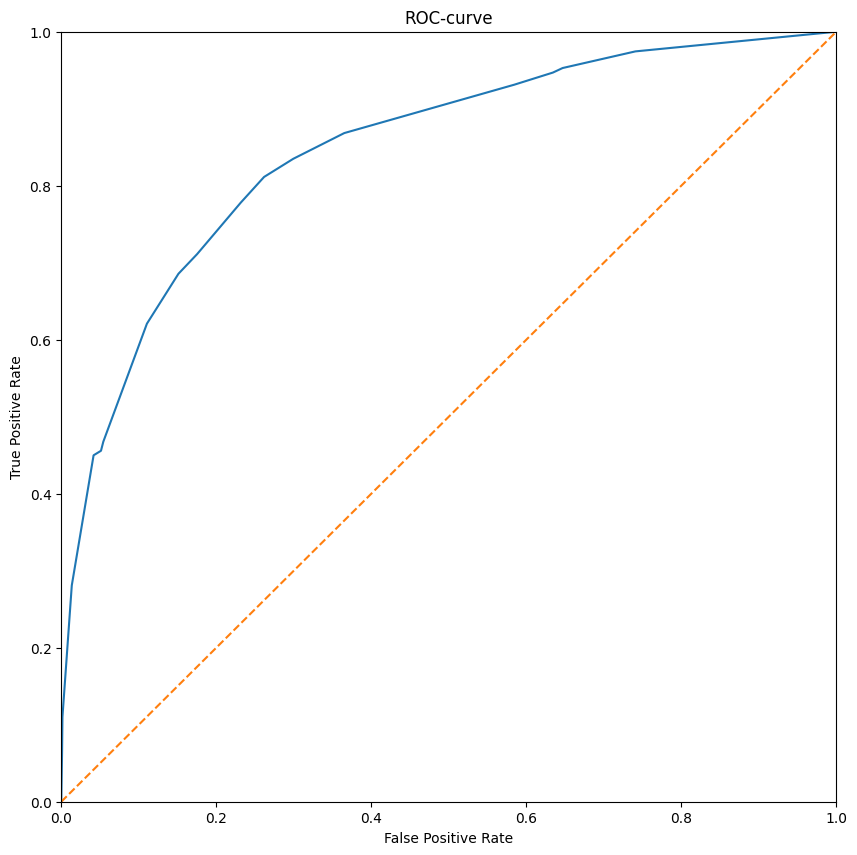

CPU times: total: 14.5 s
Wall time: 33 s


In [44]:
%%time
parametrs = { 'max_depth': range (5,10, 1),
              'min_samples_leaf':range (6,12, 1),
              'max_leaf_nodes': range(16, 22,1),
              'criterion':['gini', 'entropy'],
            }

model = DecisionTreeClassifier(random_state=12345)
model = GridSearchCV(model, param_grid=parametrs, cv=5, scoring='f1')
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)

best_model = model.best_estimator_
feature_importances = model.best_estimator_.feature_importances_


print("")
print("Выбранная модель и ее гипер-параметры:", best_model)
print("")
print("Влияение feature на модель:")
print(pd.Series(data=feature_importances, index=column_names))

print("")
print("Значение F1-меры:", f1_score(target_valid, predictions_valid))
print("")
auc_roc (features_valid)





Выбранная модель и ее гипер-параметры: RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=6,
                       n_estimators=500, random_state=12345)

Влияение feature на модель:
CreditScore          0.098692
Age                  0.292971
Tenure               0.055280
Balance              0.123128
NumOfProducts        0.188761
HasCrCard            0.012967
IsActiveMember       0.063805
EstimatedSalary      0.102834
Geography_Germany    0.030974
Geography_Spain      0.011935
Gender_Male          0.018653
dtype: float64

Значение F1-меры: 0.5609137055837563

Значение AUC модели равно: 0.867995370128249


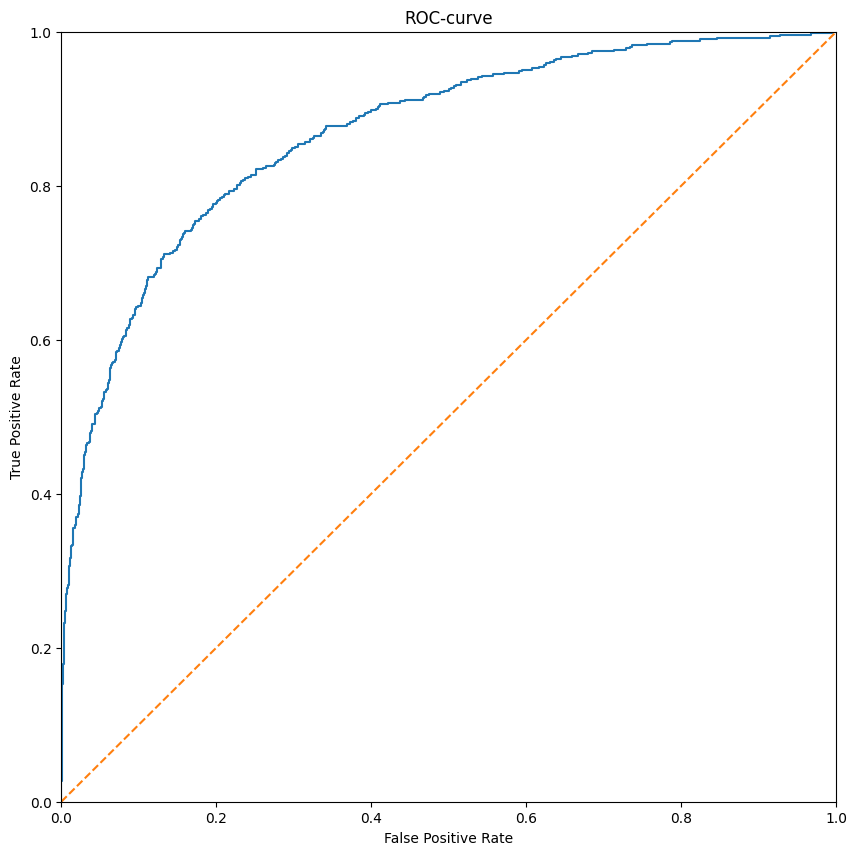

CPU times: total: 2.53 s
Wall time: 2min 49s


In [45]:
%%time

parametrs = {
    'n_estimators': np.arange(100, 1000, 50),
    'max_depth': np.arange(6, 12, 2),
     'min_samples_split' : np.arange(2, 22, 4),

 #   'min_samples_leaf': np.arange(1, 20, 1),
 #   'max_features':['log2', 'sqrt'],
    'criterion': ['gini', 'entropy'],
   # 'bootstrap': [True, False]
}



model = RandomForestClassifier(random_state=12345)
model = RandomizedSearchCV(model, param_distributions=parametrs, n_iter=100, cv=3, n_jobs=-1, random_state=12345)


model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)

best_params = model.best_params_
best_model = model.best_estimator_

feature_importances = model.best_estimator_.feature_importances_


print("")
print("Выбранная модель и ее гипер-параметры:", best_model)
print("")
print("Влияение feature на модель:")
print(pd.Series(data=feature_importances, index=column_names))

print("")
print("Значение F1-меры:", f1_score(target_valid, predictions_valid))
print("")
auc_roc (features_valid)


#### Модели с подбором гипер-паметров дали следующие результаты:
Для модели  "Логистической регрессии" оказались самыми низкими  значение F1 меры не изменились и остались в значение 0.335.

Для модели "Решающего дерева" значение F1 меры увеличились с 0.335 до 0.557.

Для модели "Случайного леса" значение F1 меры увеличились с 0.335 до 0.561.

При параметрах RandomForestClassifier(max_depth=7, max_features=0.5, min_samples_leaf=5,n_estimators=350, random_state=12345)

Из выше сказанного можно сделать вывод что наилучшим результатом обладает модель "Случайного леса" и дальнейшую работы продолжим именно с ней.

Наибольшее влияние на модель оказывают следующие параметры (features):

CreditScore  — кредитный рейтинг 0.098692 

Age  — возраст человек 0.292971

Balance  — баланс на счёте 0.123128

NumOfProducts  — количество продуктов банка, используемых клиентом 0.188761

EstimatedSalary — предполагаемая зарплата 0.102834


## Борьба с дисбалансом

Использование метода downsample

In [46]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
    [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
    [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
    features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(features_train, target_train, 0.256)


print(features_downsampled.shape)
print(target_downsampled.shape)

(1528, 11)
(1528,)


In [47]:
target_downsampled.value_counts()

Exited
0    764
1    764
Name: count, dtype: int64


Значение F1-меры: 0.6034214618973561
Значение AUC модели равно: 0.8620087051851208


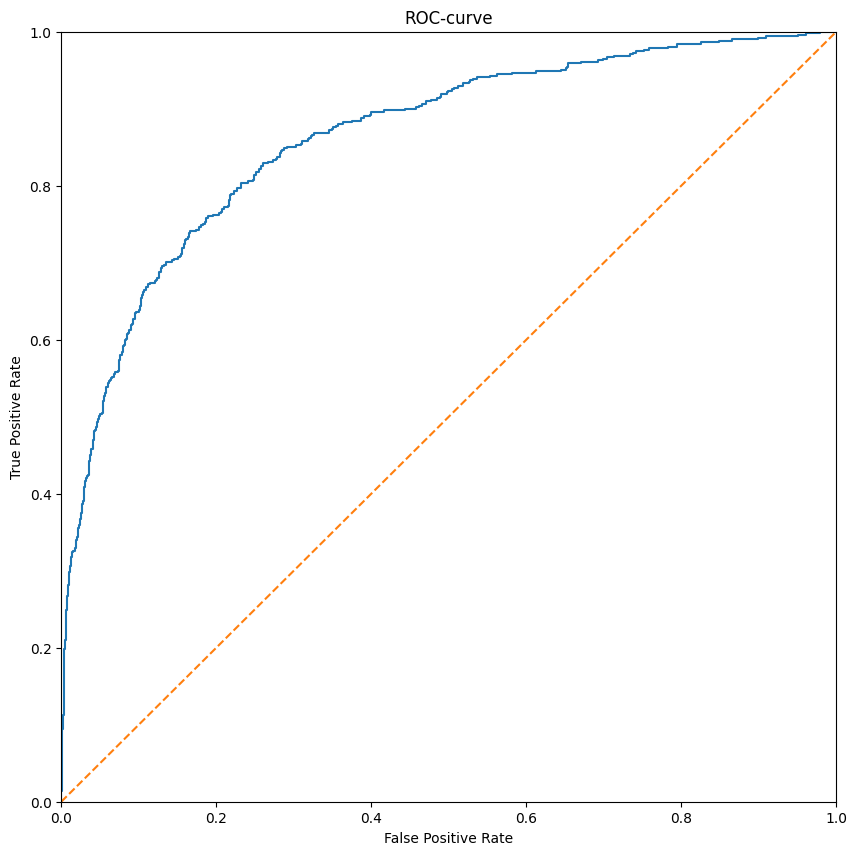

In [48]:
model=RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=6,n_estimators=500, random_state=12345,class_weight='balanced')


model.fit(features_downsampled, target_downsampled)

predictions_valid = model.predict(features_valid)

print("")
print("Значение F1-меры:", f1_score(target_valid, predictions_valid))
auc_roc (features_valid)

Использование гипер-параметра class_weight='balanced'


Значение F1-меры: 0.6295928500496525
Значение AUC модели равно: 0.8671605722805671


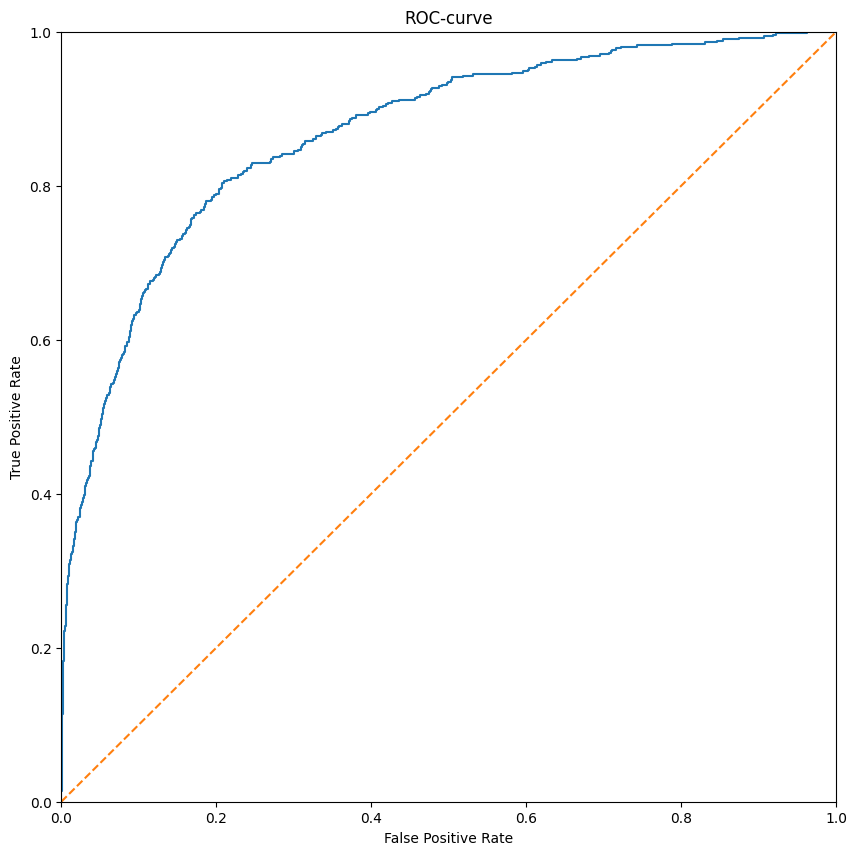

In [49]:
model=RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=6,n_estimators=500, random_state=12345,class_weight='balanced')


model.fit(features_train, target_train)

predictions_valid = model.predict(features_valid)

print("")
print("Значение F1-меры:", f1_score(target_valid, predictions_valid))
auc_roc (features_valid)

Проведя борьбу с дисбалансом методом "downsample" и используя гипер-параметр class_weight='balanced' по выбранной модели "Случайного леса" значение F1 меры увеличились с 0.561 до 0.629, что превышает требования по запрошенной метрике F1 меры 0.59.

## Тестирование модели


F1: 0.6133154001344989

Значение AUC модели равно: 0.8671605722805671


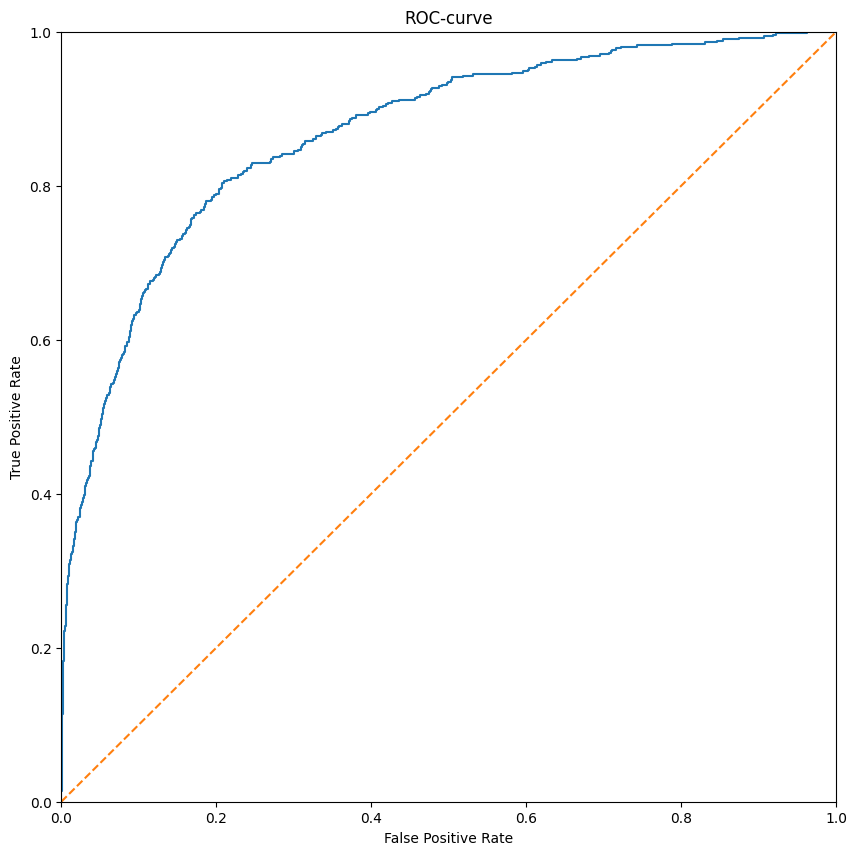

In [50]:
predictions_test = model.predict(features_test)

print("")
print("F1:", f1_score(target_test, predictions_test))
print("")
auc_roc (features_valid)

Проведя финальное тестирование  по выбранной модели "Случайного леса" получили значение  F1 меры 0.613, что превышает требования по запрошенной метрике F1 меры 0.59.

## Выводы

Были получены исторические данные о поведении клиентов и расторжении договоров с банком. 
Был выполнен прогноз, уйдёт клиент из банка в ближайшее время или нет. 

На основе построенной модели "Случайного леса"  была получена модель со значением F1-меры 0.613, что соответствует поставленному заданию довести метрику до 0.59.

### Выводы о Подготовке данных

Данные в таблице представлены в количестве 14 столбцов и 10000 строк, одна строка один пользователь. 
Данные в таблице представлены следующих типов: object, float64, int64.

В таблице предоставлены следующие данные:

Признаки

RowNumber — индекс строки в данных
CustomerId — уникальный идентификатор клиента
Surname — фамилия
CreditScore — кредитный рейтинг
Geography — страна проживания
Gender — пол
Age — возраст человек
Tenure — сколько лет человек является клиентом банка
Balance — баланс на счёте
NumOfProducts — количество продуктов банка, используемых клиентом
HasCrCard — наличие кредитной карты
IsActiveMember — активность клиента
EstimatedSalary — предполагаемая зарплата
Целевой признак

Exited — факт ухода клиента

Присутствующие пропуски данных с столбце Tenure( сколько лет человек является клиентом банка) в количестве 909 шт заполнены медианным значением 5 лет по возрастным группам.

### Выводы о Исследовании задачи

Рейтинги ушедших и оставшихся клиентов представлены нормальным распределением с медианным значением 650 Score.

Возраст оставшихся клиентов представлен положительным распределением с отклонением в право с медианным значением 35 лет.

Возраст ушедших клиентов представлен положительным распределением с отклонением в право с медианным значением 45 лет.

Особое внимание следует обратить на клиентов в возрасте от 45 до 65 лет.

Количество лет которое человек является клиентом банка среди ушедших и оставшихся клиентов распределено одинаково с медианным значением 5 лет.

Баланс ушедших и оставшихся клиентов представлен распределением c двумя пиками: нулевой баланс и 125 тыс.

Предполагаемые зарплаты представлены одинаково в объеме 100 тыс.

Банковские клиенты представлены тремя регионами Испания Франция и Германия, во всех трех регионах присутствует большая утечка клиентов, стоит отметить, что в Германии процент ушедших клиентов в 2 раза больше чем оставшихся.

По гендерному признаку стоит отметить, что женщины клиенты перестают быть клиентами банка на 10% чаще, чем мужчины.

Исключили из данных столбцы  'RowNumber', 'CustomerId', 'Surname' они не несут  никакой информации для обучения модели.

Выполнили прямое кодирование столбцов 'Geography', 'Gender'

Выполним масштабирование признаков методом StandardScaler

Разделии выборки на тренировочную, валидационную и тестовую методом train_test_split.

### Модели с подбором гипер-паметров дали следующие результаты:

Для модели  "Логистической регрессии" оказались самыми низкими  значение F1 меры не изменились и остались в значение 0.335.

Для модели "Решающего дерева" значение F1 меры увеличились с 0.335 до 0.557.

Для модели "Случайного леса" значение F1 меры увеличились с 0.335 до 0.561.

При параметрах RandomForestClassifier(max_depth=7, max_features=0.5, min_samples_leaf=5,n_estimators=350, random_state=12345)

Из выше сказанного можно сделать вывод что наилучшим результатом обладает модель "Случайного леса" и дальнейшую работы продолжим именно с ней.

Наибольшее влияние на модель оказывают следующие параметры (features):

CreditScore  — кредитный рейтинг 0.098692 

Age  — возраст человек 0.292971

Balance  — баланс на счёте 0.123128

NumOfProducts  — количество продуктов банка, используемых клиентом 0.188761

EstimatedSalary — предполагаемая зарплата 0.102834


### Выводы о Борьба с дисбалансом
Проведя борьбу с дисбалансом методом "downsample" и используя гипер-параметр class_weight='balanced' по выбранной модели "Случайного леса" значение F1 меры увеличились с 0.561 до 0.629, что превышает требования по запрошенной метрике F1 меры 0.59.

###  Выводы о Тестировании модели
Проведя финальное тестирование  по выбранной модели "Случайного леса" получили значение  F1 меры 0.613, что превышает требования по запрошенной метрике F1 меры 0.59.